## Convolutional Neutral Network -- Classifying FMNIST

#### Data Setup and Formating

In [1]:
# Import Tensorflow 
%pip install tensorflow # ML model building

import tensorflow.keras as keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2025-03-02 17:30:04.658135: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 17:30:04.660128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 17:30:04.690047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 17:30:04.691188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-02 17:30:05.231047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [2]:
# Import the test and validation sets
(x_train, y_train), (x_valid, y_valid) = keras.datasets.fashion_mnist.load_data()

In [3]:
## Condition the data

# Reshape to 28x28 of 1 dimension
# Note: Data is imported as such, without the "1 dimension" part
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

# Min-Max normalizing pixel values (255-0 -> 1-0)
x_train = x_train / 255
x_valid = x_valid / 255

### Categorically Labeling the Data

- 0 	T-shirt/top
- 1 	Trouser
- 2 	Pullover
- 3 	Dress
- 4 	Coat
- 5 	Sandal
- 6 	Shirt
- 7 	Sneaker
- 8 	Bag
- 9 	Ankle boot

In [4]:
num_categories = 10

# Label data using 10 categories
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

### Model Creation

In [5]:
model = keras.models.Sequential() # One layer after another

## Conv2D
# num filter, kernel sz, stride, padding, activation func     
model.add(Conv2D(6, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(16, kernel_size=5, strides=1, padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))

## Convert from Conv2D to MLP
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(60))
model.add(Dense(10, activation="softmax")) # Classification

2025-03-02 17:30:06.159895: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Model Compilation & Summary

In [ ]:
model.summary()

# Compile model using cross-entropy loss function
# Specify leraning rate (i.e. 0.01) using Adam
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 16)       64        
 hNormalization)                                                 
                                                        

### Train Model

In [7]:
# Model will stop training when no improvement after 3 epochs 
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# verbose=2 gives 1-line summary of each epoch
history = model.fit(x_train, y_train, epochs=15, verbose=2, validation_data=(x_valid, y_valid), callbacks=[callback])

Epoch 1/15
1875/1875 - 26s - loss: 0.5008 - accuracy: 0.8324 - val_loss: 0.4777 - val_accuracy: 0.8343 - 26s/epoch - 14ms/step
Epoch 2/15
1875/1875 - 26s - loss: 0.3779 - accuracy: 0.8666 - val_loss: 0.3708 - val_accuracy: 0.8692 - 26s/epoch - 14ms/step
Epoch 3/15
1875/1875 - 27s - loss: 0.3617 - accuracy: 0.8717 - val_loss: 0.4945 - val_accuracy: 0.8144 - 27s/epoch - 14ms/step
Epoch 4/15
1875/1875 - 27s - loss: 0.3482 - accuracy: 0.8782 - val_loss: 0.4529 - val_accuracy: 0.8437 - 27s/epoch - 14ms/step
Epoch 5/15
1875/1875 - 27s - loss: 0.3444 - accuracy: 0.8796 - val_loss: 0.3567 - val_accuracy: 0.8662 - 27s/epoch - 14ms/step
Epoch 6/15
1875/1875 - 27s - loss: 0.3309 - accuracy: 0.8839 - val_loss: 0.4064 - val_accuracy: 0.8645 - 27s/epoch - 15ms/step
Epoch 7/15
1875/1875 - 27s - loss: 0.3292 - accuracy: 0.8837 - val_loss: 0.3590 - val_accuracy: 0.8766 - 27s/epoch - 14ms/step
Epoch 8/15
1875/1875 - 27s - loss: 0.3260 - accuracy: 0.8866 - val_loss: 0.5687 - val_accuracy: 0.8219 - 27s/ep

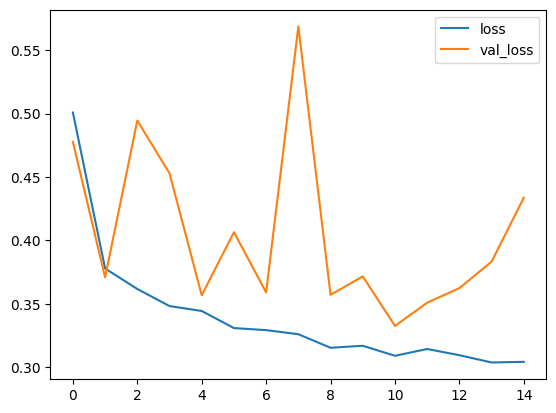

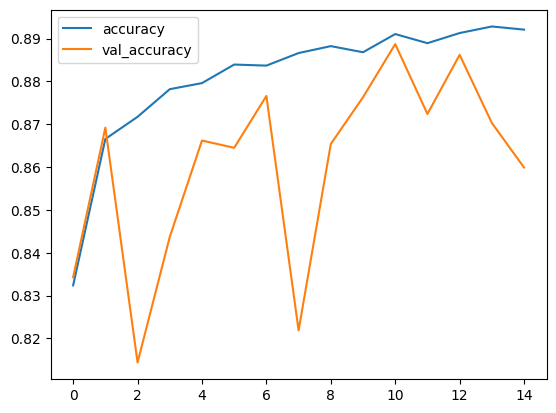

In [8]:
# Dataframe to hold data ; matplot to display it
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()